In [1]:
import numpy as np
X=np.loadtxt('X.txt')
y=np.loadtxt('y.txt')

In [2]:
import matplotlib.pyplot as plt

In [3]:
def plot_data_internal(X, y):
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5 
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5 
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), \
        np.linspace(y_min , y_max , 100)) 
    plt.figure()
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1') 
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2') 
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Dataset')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1) 
    return xx , yy

In [4]:
def plot_data(X, y):
    xx, yy = plot_data_internal(X, y) 
    plt.show()

In [5]:
x_train=X[:800,:]
x_test=X[800:,:]
y_train=y[:800]
y_test=y[800:]

Find wmap using the scipy method

In [6]:
def compute_ll(X, y, w):
    output_prob = logistic(np.dot(X, w))
    return y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob)

In [7]:
def logistic(x): 
    return 1.0 / (1.0 + np.exp(-x))

In [8]:
def compute_average_ll(X, y, w):
    output_prob = logistic(np.dot(X, w))
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))

In [9]:
def gradient(x,y,beta):
    
    A= np.matmul(x,beta)
    B=y-logistic(A)
    return np.matmul(np.transpose(x),B)

In [10]:
def learning(x,y,n):
    x=np.concatenate((np.ones((x.shape[0],1)),x),1)
    W_new=np.transpose(np.random.randn(x.shape[1])*0.01)
    ll=[]
    for iterations in range(100):
        W_old=W_new
        W_new= W_old + n*gradient(x,y,W_old)
        ll.append(compute_average_ll(x,y,W_new))
    plot_ll(ll)
    print(ll[-1])
    return W_new

In [11]:
def plot_ll(ll): 
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2) 
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1) 
    ax.plot(np.arange(1, len(ll) + 1), ll,'r-') 
    plt.xlabel('Steps') 
    plt.ylabel('Average log-likelihood') 
    plt.title('Plot Average Log-likelihood Curve') 
    plt.show()

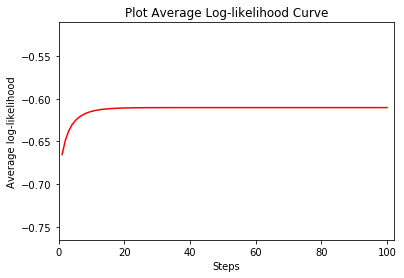

-0.6102974904623829


In [12]:
w_l=np.transpose(learning(x_train,y_train,0.001))

In [13]:
def confusion_bay(x,y):
    y_pred=np.round(predict_for_plot_expanded_features_baysian(x))
    A=0
    B=0
    C=0
    D=0
    for i in range(len(y)):
        if y_pred[i]==0 and y[i]==0:
            A+=1
        elif y_pred[i]==1 and y[i]==0:
            B+=1
        elif y_pred[i]==0 and y[i]==1:
            C+=1
        elif y_pred[i]==1 and y[i]==1:
            D+=1
    conf=np.array([[A,B],[C,D]])
    return conf/len(y)

In [14]:
def confusion_map(x,y):
    y_pred=np.round(predict_for_plot_expanded_features(x))
    A=0
    B=0
    C=0
    D=0
    for i in range(len(y)):
        if y_pred[i]==0 and y[i]==0:
            A+=1
        elif y_pred[i]==1 and y[i]==0:
            B+=1
        elif y_pred[i]==0 and y[i]==1:
            C+=1
        elif y_pred[i]==1 and y[i]==1:
            D+=1
    conf=np.array([[A,B],[C,D]])
    return conf/len(y)

In [15]:
from scipy.special import expit
def function(w,X,y,var):
    func =-np.sum(y * np.log(logistic(np.dot(X,np.transpose(w)))) + (1 - y) * np.log(1-logistic(np.dot(X,np.transpose(w)))))
    func+= np.dot(w,w)/(2*var)
    return func
    

def gradient(w,X,y,var):
    grad = -np.matmul(np.transpose(X),(y-logistic(np.matmul(X,w))))
    grad+= w/var
    return grad
    

In [16]:
from scipy import optimize
import random


def learning(X,y,var,func,grad):
    x=np.concatenate((np.ones((X.shape[0],1)),X),1)
    W_init=np.transpose(np.random.randn(x.shape[1])*0.01)
    w_map, val, d =optimize.fmin_l_bfgs_b(func,W_init,grad,(x,y,var))
    return w_map

In [17]:
variance=10
w_map=learning(x_train,y_train,variance,function,gradient)
print(w_map)

[ 0.33637398 -0.10764134  0.891017  ]


In [18]:
def predict_for_plot(x): 
    x_tilde = np.concatenate((np.ones((x.shape[ 0 ], 1 )), x), 1)
    return logistic(np.dot(x_tilde, w_map))

In [19]:
def plot_predictive_distribution(X, y, predict):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_predict = np.concatenate((xx.ravel().reshape((-1, 1)), \
        yy.ravel().reshape((-1, 1))), 1)
    Z = predict(X_predict)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()

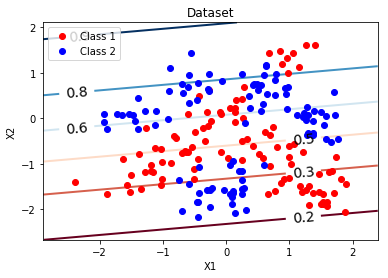

In [20]:
plot_predictive_distribution(x_test,y_test,predict_for_plot)

In [30]:
def expand_inputs(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

In [45]:
def predict_for_plot_expanded_features(x):
    x_expanded=expand_inputs(l,x,Z)
    print(x_expanded.shape)
    x_tilde = np.concatenate((np.ones((x_expanded.shape[ 0 ], 1 )), x_expanded), 1)
    return logistic(np.dot(x_tilde, w_map_exp))

In [46]:
l=0.16768329
x_train_exp=expand_inputs(l,x_train, x_train)
x_test_test=expand_inputs(l,x_test, x_train)
w_map_exp=learning(x_train_exp,y_train,variance,function,gradient)

(10000, 800)


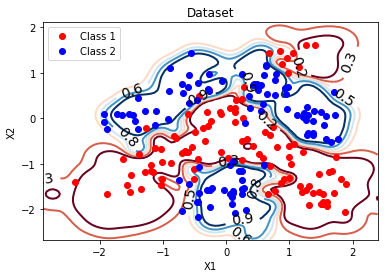

In [47]:
Z=x_train
plot_predictive_distribution(x_test,y_test,predict_for_plot_expanded_features)

In [34]:
# for this function use x_train_exp_c and w_map_exp
def Laplace(x,w,var):
    x= np.concatenate((np.ones((x.shape[ 0 ], 1 )), x), 1)
    S_0_inv=np.empty((np.shape(w)[0],np.shape(w)[0]))
    np.fill_diagonal(S_0_inv,1/var)
    y_n=logistic(np.matmul(x,w))
    a=(np.ones(np.shape(y_n))-y_n)*y_n
    scaled_a=np.transpose(np.tile(np.transpose(a),(np.shape(x)[1],1)))
    scaled_x=x*scaled_a
    SUM= np.matmul(np.transpose(x),scaled_x)
    S_N_inv=SUM+S_0_inv
    S_n=np.linalg.inv(S_N_inv)
    return S_n

In [35]:
S_N= Laplace(x_train_exp,w_map_exp,variance)

In [314]:
def kappa(var):
    return np.reciprocal(np.sqrt(np.ones(np.shape(var))+(np.pi/8)*var))

In [36]:
def predict_for_plot_expanded_features_baysian(x):
    x_expanded=expand_inputs(l,x,Z)
    print(X_expanded.shape)
    x_tilde = np.concatenate((np.ones((x_expanded.shape[ 0 ], 1 )), x_expanded), 1)
    print(x_tilde.shape)
    variance_a=np.diag(np.matmul(np.matmul(x_tilde,S_N),np.transpose(x_tilde)))
    mean_a =np.matmul(x_tilde,w_map_exp)
    return logistic(kappa(variance_a)*mean_a)


In [37]:
def compute_average_ll_bay(x,y):
    output_prob = predict_for_plot_expanded_features_baysian(x)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))

NameError: name 'X_expanded' is not defined

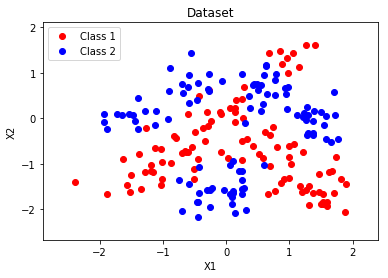

In [38]:
plot_predictive_distribution(x_test,y_test,predict_for_plot_expanded_features_baysian)

In [322]:
print(confusion_map(x_test,y_test))
print(confusion_bay(x_test,y_test))

[[0.445 0.06 ]
 [0.04  0.455]]
[[0.445 0.06 ]
 [0.04  0.455]]


In [324]:
print(confusion_map(x_train,y_train))
print(confusion_bay(x_train,y_train))

[[0.47875 0.0275 ]
 [0.02375 0.47   ]]
[[0.47875 0.0275 ]
 [0.02375 0.47   ]]


In [164]:
def grid():
    li=np.linspace(0.05,1,20)
    var_i=np.linspace(0.01,10,20)
    grid=np.empty((len(li),len(var_i),2))
    for i in range(len(li)):
        for j in range(len(var_i)):
            grid[i][j]=np.array([li[i],var_i[j]])
    return grid

In [287]:
def grid_log():
    li=np.logspace(-2,1,50,base=10)
    var_i=np.logspace(-2,1,50,base=10)
    grid=np.empty((len(li),len(var_i),2))
    for i in range(len(li)):
        for j in range(len(var_i)):
            grid[i][j]=np.array([li[i],var_i[j]])
    return grid

In [289]:
gr_log=grid_log()

In [178]:
print("ML for logarithmic scale ",LIST_LOG[np.argmax(LIST_LOG[:,2]),:])
print("ML for linear scale ",LIST_LOG[np.argmax(LIST[:,2]),:])

ML for logarithmic scale  [0.54555948 0.1274275  0.92       0.92      ]
ML for linear scale  [0.0143845 0.01      0.905     0.905    ]


In [325]:
x_test_exp=expand_inputs(l,x_test,x_train)
x_train_exp_c= np.concatenate((np.ones((x_train_exp.shape[ 0 ], 1 )), x_train_exp), 1)
x_test_exp_c=np.concatenate((np.ones((x_test_exp.shape[ 0 ], 1 )), x_test_exp), 1)
print('Average Log likelihood map training data=',compute_average_ll(x_train_exp_c, y_train, w_map_exp))
print('Average Log likelihood map test data=',compute_average_ll(x_test_exp_c, y_test, w_map_exp))

Average Log likelihood map training data= -0.12124856700220989
Average Log likelihood map test data= -0.25832223129247955


In [326]:
print('Average log likelihood bay train data', compute_average_ll_bay(x_train,y_train))
print('Average log likelihood bay test data', compute_average_ll_bay(x_test,y_test))

Average log likelihood bay train data -0.21391211579192781
Average log likelihood bay test data -0.29539844491458506


In [290]:
def log_prior(w, var, M):
    log_p_prior = -np.dot(w.T,w)/(2*var) - (M/2) * np.log(2*np.pi) -(M/2) * np.log(var)
    return log_p_prior

def log_likelihood(w, X, y):
    p = logistic(np.dot(X,w)) # colbest_accuracy, best_values, x, y, z = eval_best_model(grid, x_train, x_test, y_train, y_test, predict_for_plot_expanded_features_bayesian)umn vector of output probabilities
    ll = np.dot(y.T,np.log(p)) + np.dot((1.0-y).T,np.log(1.0-p))
    return ll

def find_log_det_A(A):
    eigs = np.linalg.eigvals(A)
    log_det_A = np.sum(np.log(eigs))
    return log_det_A

def log_model_evidence(w, X, y, var, M):
    ll = log_likelihood(w, X, y)
    log_p_prior = log_prior(w, var, M)
    A = A_matrix(w, X, y, M, var)
    log_det_A = find_log_det_A(A) 

    log_evidence = ll + log_p_prior + (M/2)*np.log(2*np.pi) - 0.5*log_det_A
    return np.real(log_evidence)
def A_matrix(w, X, y, M, var):
    p = logistic(np.dot(X,w)) # column vector of output probabilities
    
    S0_inv = np.zeros([M,M]) # inverse of Gaussian prior covariance matrix
    
    for i in range(0,M):
        S0_inv[i,i] = 1/var
    
    A = np.zeros([M,M])
    A += S0_inv
    
    for j in range(0,X.shape[0]):
        factor = p[j]*(1-p[j])
        cov = np.dot(X[j,:].T,X[j,:])
        A += factor*cov
    
    return A

def eval_best_model(input_grid, x_train, x_test, y_train, y_test, predict):
    rbf_width = []
    var = []
    log_ev = []
    log_test = []
    acc = []
    for row in input_grid:
        for entry in row:
            l = entry[0]
            variance = entry[1]
            x_train_exp = expand_inputs(l, x_train, x_train)
            x_train_exp_c = np.concatenate((np.ones((x_train_exp.shape[ 0 ], 1 )), x_train_exp), 1) # Add ones to X
            #Get w  map with these parameters
            w=learning(x_train_exp,y_train,variance,function,gradient)
            avg_ll =compute_average_ll(x_train_exp_c, y_train, w)
            log_evidence = log_model_evidence(w,x_train_exp_c, y_train, variance, len(w))
            Z=x_train
            x_test_exp = expand_inputs(l, x_test, x_train)
            x_test_exp_new = np.concatenate((np.ones((x_test_exp.shape[ 0 ], 1 )), x_test_exp), 1)
            test_log_evidence = log_model_evidence(w,x_test_exp_new, y_test, variance, len(w))
            A = confusion_bay(x_test, y_test)
            
            accuracy = A[0][0]+A[1][1]

            acc.append(accuracy)
            rbf_width.append(l)
            var.append(variance)
            log_ev.append(log_evidence)
            log_test.append(test_log_evidence)
    return  rbf_width, var, log_ev, log_test, acc

In [291]:
x, y, z, g, acc = eval_best_model(gr_log, x_train, x_test, y_train, y_test, predict_for_plot_expanded_features)



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


In [304]:
x=np.asarray(x)
y=np.asarray(y)
z=np.asarray(z)
g=np.asarray(g)
acc=np.asarray(acc)
print("ML for linear scale "),
print("Evidence",z[np.argmax(z)])
print("Accuracy",acc[np.argmax(z)])
print("RBF width",x[np.argmax(z)])
print("Varience",y[np.argmax(z)])

ML for linear scale 
Evidence -121.50378841262818
Accuracy 0.91
RBF width 0.16768329368110083
Varience 10.0


<IPython.core.display.Javascript object>


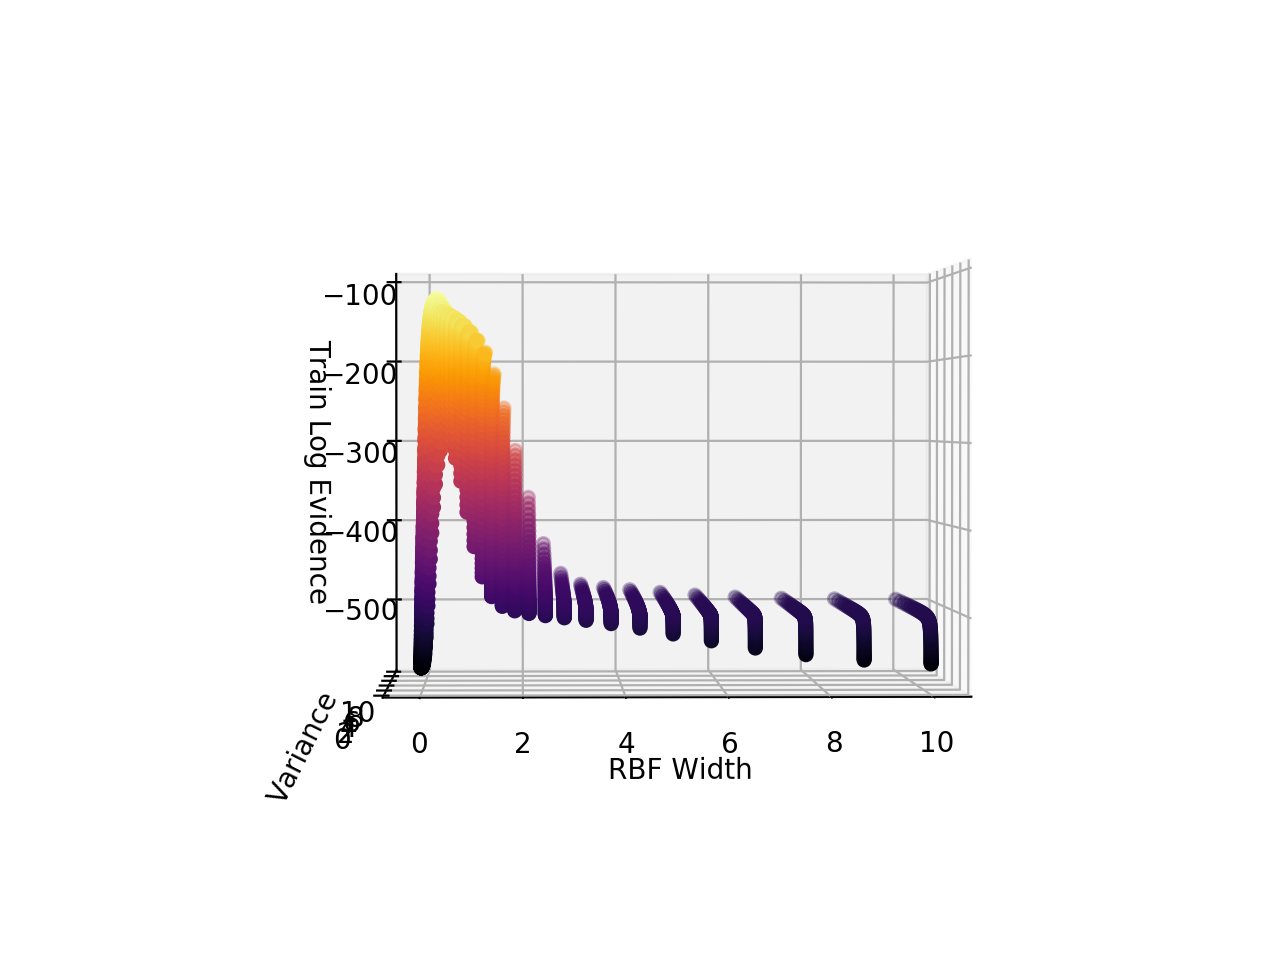

In [301]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z,c=z,cmap='inferno')
#ax.xaxis.set_scale('log')
#ax.yaxis.set_scale('log')
ax.set_xlabel('RBF Width')
ax.set_ylabel('Variance')
ax.set_zlabel('Train Log Evidence')
plt.show()

<IPython.core.display.Javascript object>


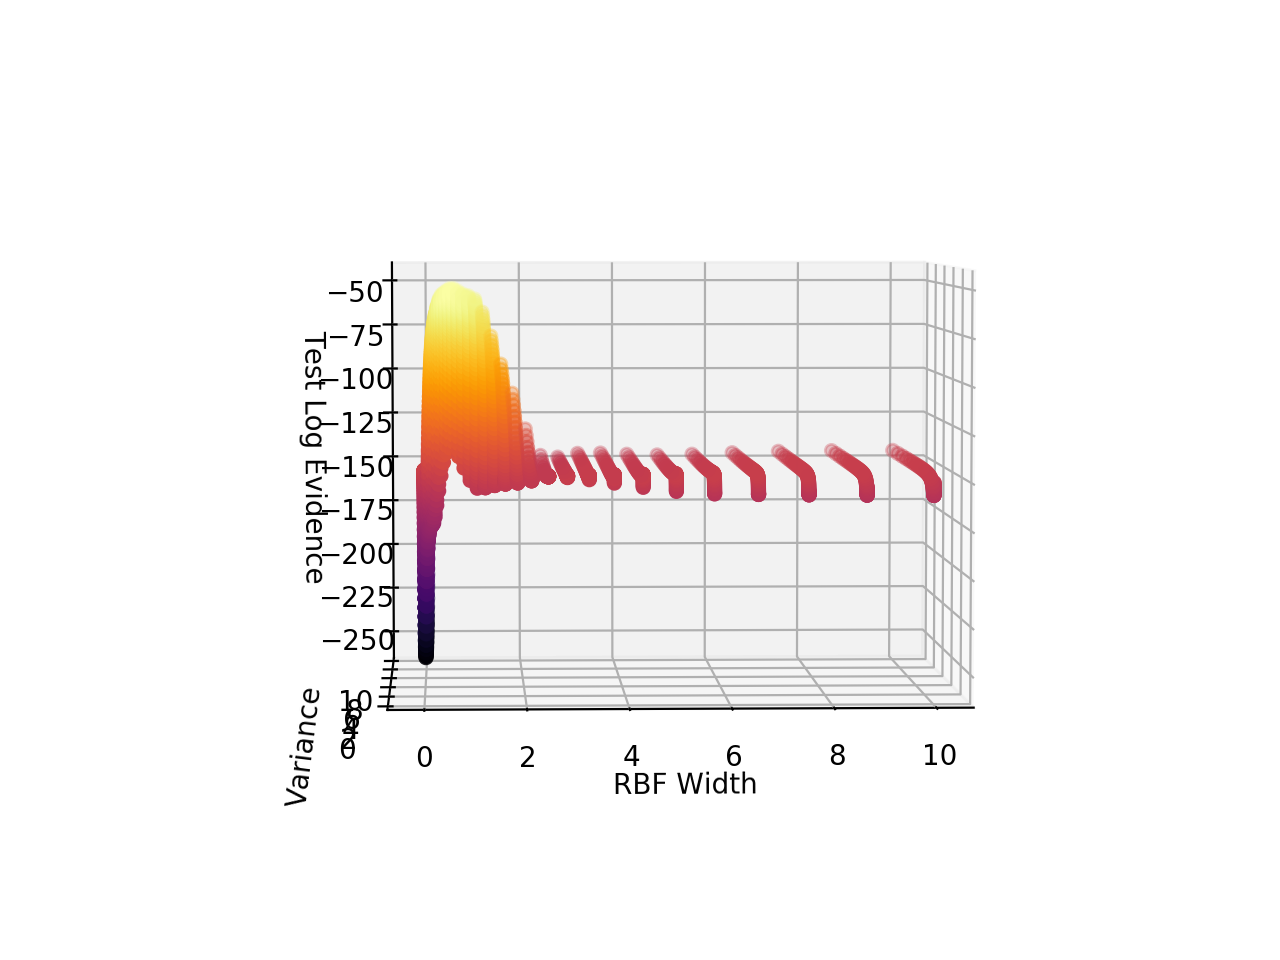

In [302]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, g,c=g,cmap='inferno')
#ax.xaxis.set_scale('log')
#ax.yaxis.set_scale('log')
ax.set_xlabel('RBF Width')
ax.set_ylabel('Variance')
ax.set_zlabel('Test Log Evidence')
plt.show()

